## Approach 1 - GPT 3.5 API

This is Approach 1 of 3 of surveying which model would give the best results.

Approach 1: Using OpenAI API\
Approach 2: Using finetuning on Llama-3\
Approach 3: Concatenating sentiment analysis output and then passing through Approach 2 model.

This approach shows the simple way of generating text based on inputs from a mental health chat dataset, and comparing it to the ones by the actual therapists. The model showcases understanding of human text and generating text in a similar fashion of that of a therapist.


In [38]:
import os
import csv
import openai

import pandas as pd


### Viewing our input data


This input data is chosen from: https://huggingface.co/datasets/mpingale/mental-health-chat-dataset/viewer/default/train?f[topic][min]=23&f[topic][imax]=24&f[topic][transform]=length


The inputs are curated to make sure we have equal representations of the various classes which include: trauma, anxiety, depression, self-esteem, grief-and-loss, anger-management, domestic-violence, professional-ethics, relationship-dissolution.

We can see a class-imbalance in the labelling, in the screenshot given in the directory.

<!-- ![Screenshot 2024-05-05 231442.png](<attachment:Screenshot 2024-05-05 231442.png>) -->
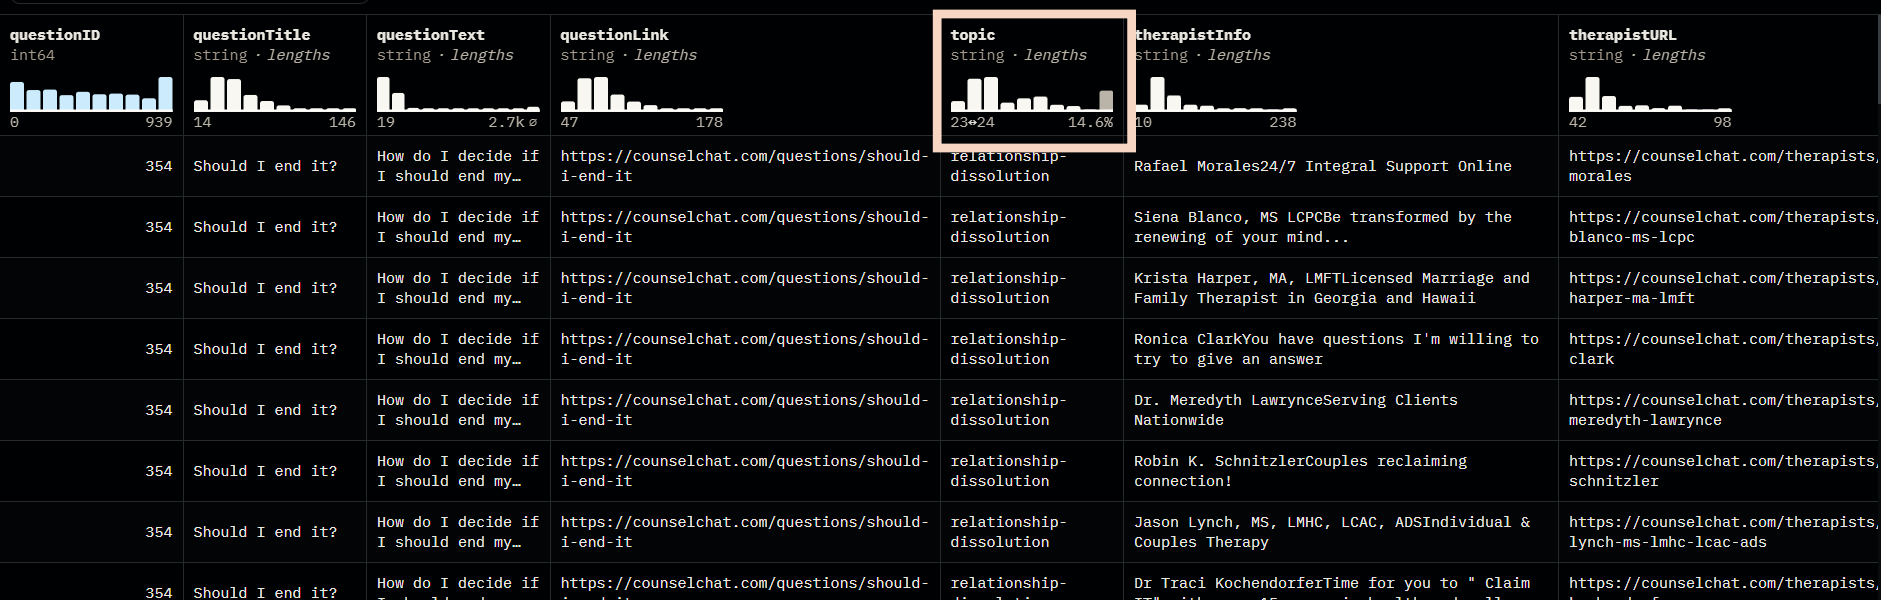

So equal portions of each label is kept in this separate CSV file.

In [36]:
input_df = pd.read_csv("input_questions.csv")
input_df

,Input
0,I often struggle to stay motivated to exercise...
1,I often feel defensive and upset when receivin...
2,I often feel overwhelmed by the demands of my ...
3,I often feel lonely and disconnected from othe...
4,I often struggle to manage my time effectively...
...,...
251,"I'm in my late 20s. I have two jobs right now,..."
252,I nanny a three year old. When he wakes up in ...
253,I've been bullied for years and the teachers h...
254,I need to get on base to see my doctor. My ID ...


### Using GPT 3.5-tubro API

The next code blocks simply just use open_ai model gpt-3.5-turbo.

The open-ai library is initialized with our key with quota to be able to use the API.
It is removed from this code (after having running and testing it) for privacy reasons.

In [2]:
openai.api_key = "OPENAI_KEY"

In [3]:
def ask(text):
  
  completion = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
      {'role': 'user', 'content': text}
    ],
    temperature=0
  )
  return completion.choices[0].message.content


In [4]:

def process_csv_input(file_path):
    with open(file_path, mode='r', newline='', encoding='utf-8') as file:
        reader = csv.reader(file)
        inputs = [row[0] for row in reader]
    outputs = [ask(input_text) for input_text in inputs]
    return inputs, outputs

def write_outputs_to_csv(input_output_pairs, output_file_path):
    with open(output_file_path, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        for pair in input_output_pairs:
            writer.writerow(pair)
            
def handle_csv_processing(input_csv_path, output_csv_path):
    inputs, outputs = process_csv_input(input_csv_path)
    input_output_pairs = list(zip(inputs, outputs))
    write_outputs_to_csv(input_output_pairs, output_csv_path)


In [8]:
input_csv_path = 'input_questions.csv'
output_csv_path = 'output_answers.csv'
handle_csv_processing(input_csv_path, output_csv_path)


### Viewing output results.

In [28]:
output_df = pd.read_csv("output_answers.csv")
output_df

,Input,Output
0,I often struggle to stay motivated to exercise...,Here are some tips to help you stay motivated ...
1,I often feel defensive and upset when receivin...,1. Listen without reacting: When receiving cri...
2,I often feel overwhelmed by the demands of my ...,Setting healthy boundaries with friends can be...
3,I often feel lonely and disconnected from othe...,1. Reach out to friends and family: Even if yo...
4,I often struggle to manage my time effectively...,Here are some tips to help improve your time m...
...,...,...
251,"I'm in my late 20s. I have two jobs right now,...",It sounds like you have a lot on your plate ri...
252,I nanny a three year old. When he wakes up in ...,It sounds like the three year old may be exper...
253,I've been bullied for years and the teachers h...,I'm sorry to hear that you have been dealing w...
254,I need to get on base to see my doctor. My ID ...,"If you are unable to reach your husband, you c..."


### Examing the outputs

In [53]:
print("Input:")

output_df.iloc[13,0]


Input:


'My girlfriend just quit drinking and she became really depressed. She told me that she wants to move. What can I do to help her? I want her to stay.'

In [54]:
print("Output:")
output_df.iloc[13,1]


Output:


"It's great that you want to support your girlfriend during this difficult time. Here are some things you can do to help her:\n\n1. Listen to her: Let her know that you are there for her and that you are willing to listen to her feelings and concerns without judgment.\n\n2. Encourage her to seek professional help: Suggest that she speak to a therapist or counselor who can help her navigate her feelings and provide support during this challenging time.\n\n3. Be patient and understanding: Understand that quitting drinking can be a difficult process and that she may be experiencing a range of emotions. Be patient with her and offer your support and understanding.\n\n4. Encourage healthy habits: Encourage her to engage in activities that promote her mental and physical well-being, such as exercise, meditation, or spending time outdoors.\n\n5. Show your love and support: Let her know that you care about her and that you are there for her no matter what. Reassure her that you will support he

### Evaluation

We examine these outputs based on some metrics such as:
- Relevance
- Grammar
- Completeness
- Senstive topics respond
- Human-like Response

In the above response, we can actually see that the output matches all of these pretty well.
It breaks down the problem in simpler tasks which makes it easy to follow. It also acknowledges as well that the person is doing a good deed, thus validating feelings further. The punctuation and grammar all make sense as well. And it deals with such topics with encouragement and support.


Futhermore, we can compare the actual responses of therapists to the input texts using the dataset.


In [59]:
actual_df = pd.read_csv("counsel_chat.csv")
actual_df.head()

,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views
0,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,Jennifer MolinariHypnotherapist & Licensed Cou...,https://counselchat.com/therapists/jennifer-mo...,It is very common for people to have multiple ...,3,1971
1,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,"Jason Lynch, MS, LMHC, LCAC, ADSIndividual & C...",https://counselchat.com/therapists/jason-lynch...,"I've never heard of someone having ""too many i...",2,386
2,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,Shakeeta TorresFaith Based Mental Health Couns...,https://counselchat.com/therapists/shakeeta-to...,Absolutely not. I strongly recommending worki...,2,3071
3,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,"Noorayne ChevalierMA, RP, CCC, CCAC, LLP (Mich...",https://counselchat.com/therapists/noorayne-ch...,Let me start by saying there are never too man...,2,2643
4,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,"Toni Teixeira, LCSWYour road to healing begins...",https://counselchat.com/therapists/toni-teixei...,I just want to acknowledge you for the courage...,1,256


In [67]:

for i in range(0,6):
    print(f"\n\nTherapist {i+1} response of the same input above:\n")
    print(actual_df[actual_df.apply(lambda row: row.astype(str).str.contains('My girlfriend just quit drinking and she became really depressed.').any(), axis=1)].iloc[i,7])




Therapist 1 response of the same input above:

You're probably not going to like my answer.Your question says a lot about what YOU want rather than what she wants or what may be best for her. Sometimes, what's best for a person is the hardest thing to do, and may be completely opposite of what YOU want.Addictions don't happen in a vacuum. If you've had any experience with addicts at all, then I'm sure you've heard the term "enabler". A lot of the times, when people think they're "helping", they're actually enabling the addict to continue their self-destructive behavior. Tough love and clear boundaries are needed in a lot of situations, but especially with addictions. Family and friends are often the biggest contributing factor to someone choosing to use/drink, continuing to do so, or relapsing back into it.You said she recently quit. You said she is depressed. She wants to move. When a person receives counseling for addictions, they are encouraged to make changes like this. They need

From therapist 3 response, we can see that the gpt-3.5-turbo is similar to that response. Moreover, the initial opening of "It's great that you want to support your girlfriend during this difficult time" from the model is a better touch as it gives a better show of support.

Moreover, the chatbot gives further instructions by dividing the solution into steps which makes it easier to follow.

## End of Approach 1